**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read Dataset

df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/CustomerSpendingScore.csv')
df.head()

,Sex,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
0,Male,0,19,15000,39
1,Male,0,21,15000,81
2,Female,1,20,16000,6
3,Female,1,23,16000,77
4,Female,1,31,17000,40


**Feature Scaling**

In [4]:
df.columns

Index(['Sex', 'Gender', 'Age', 'Annual Income(1,000s)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
X= df[['Gender', 'Age', 'Annual Income(1,000s)',
       'Spending Score (1-100)']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()

In [7]:
X_scaled= mms.fit_transform(X)

In [11]:
type(X_scaled)

numpy.ndarray

**Now convert this np array into a dataframe**

In [12]:
pd.DataFrame(X_scaled, columns= X.columns)

,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918
196,1.0,0.519231,0.909836,0.275510
197,0.0,0.269231,0.909836,0.744898
198,0.0,0.269231,1.000000,0.173469


In [13]:
X_scaled= pd.DataFrame(X_scaled, columns= X.columns)

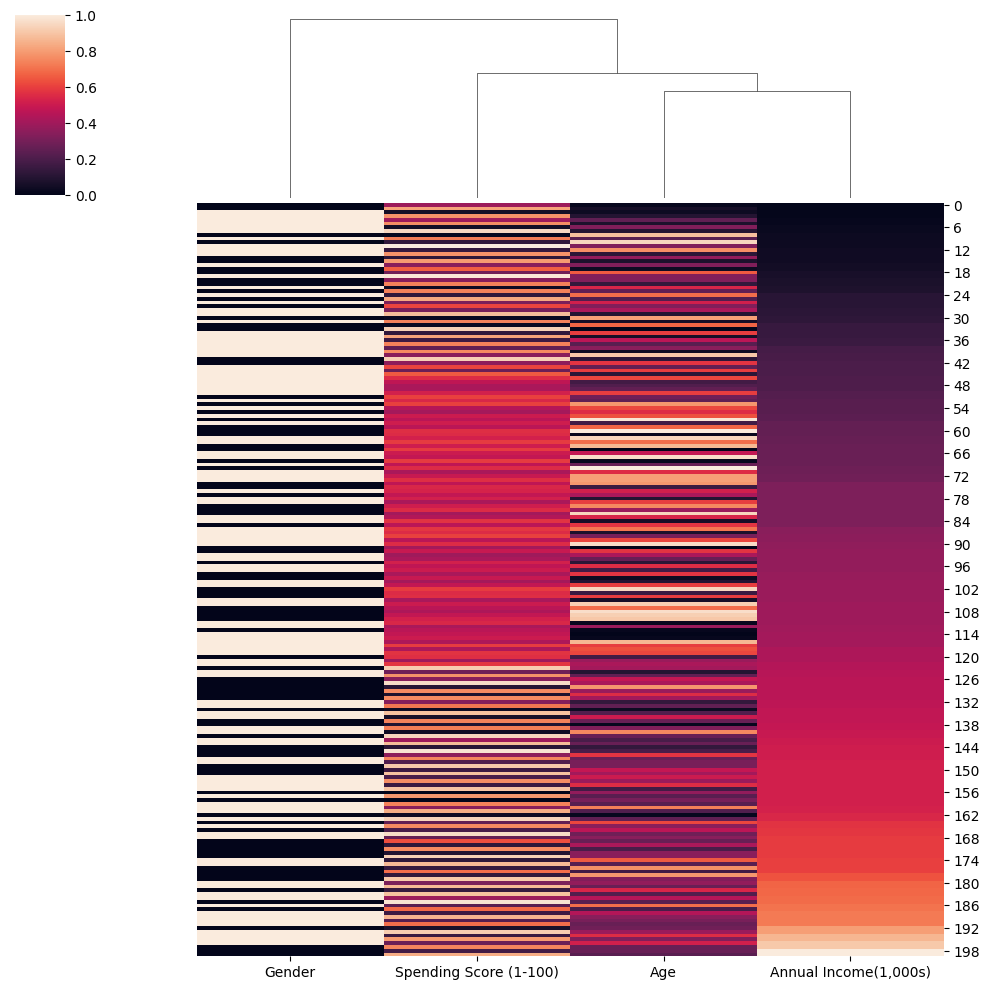

In [14]:
sns.clustermap(X_scaled, row_cluster= False)

In [15]:
X.corr()

,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
"Annual Income(1,000s)",-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [16]:
X_scaled.corr()

,Gender,Age,"Annual Income(1,000s)",Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
"Annual Income(1,000s)",-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


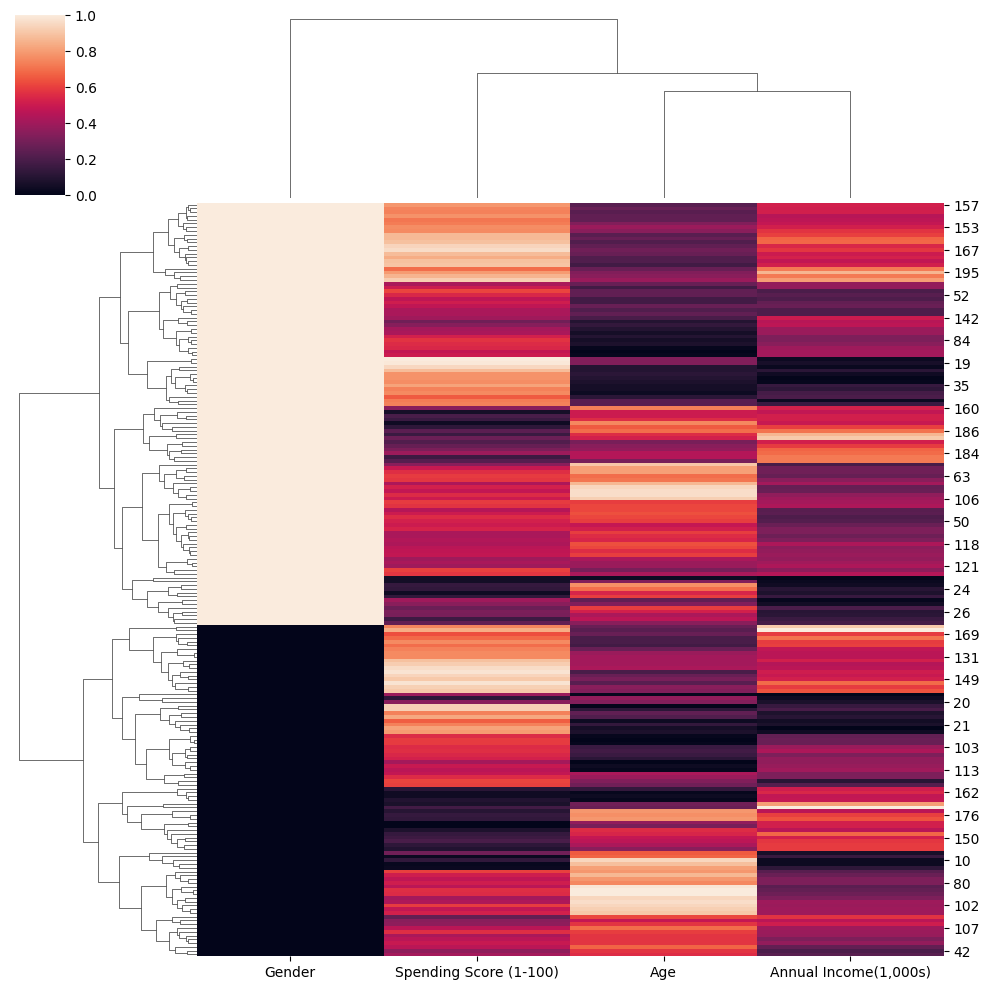

In [17]:
sns.clustermap(X_scaled, row_cluster= True)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model= AgglomerativeClustering(n_clusters=4)

In [21]:
model.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [22]:
model.fit_predict(X_scaled)

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [23]:
cluster_labels= model.fit_predict(X_scaled)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

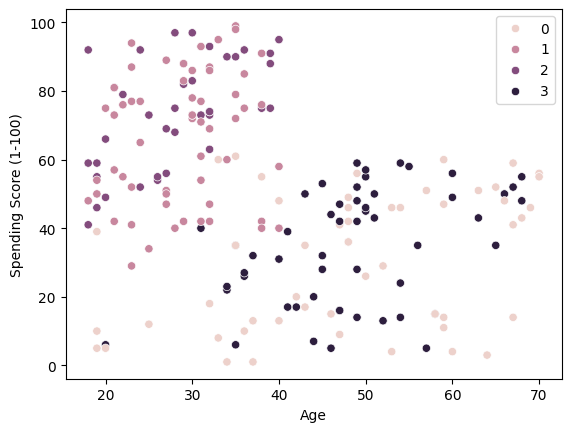

In [24]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X, hue=cluster_labels)

**Market Basket Analysis**

In [25]:
import pandas as pd
import numpy as np

In [27]:
df= pd.read_csv('https://github.com/YBIFoundation/MarketBasketAnalysis/raw/main/DataSet/BookstoreTransaction.csv')
df.head()

,Transaction
0,"History,Bookmark"
1,"History,Bookmark"
2,"Fiction,Bookmark"
3,"Biography,Bookmark"
4,"History,Bookmark"


**Pre Processing**

In [28]:
transaction =df['Transaction'].apply(lambda x:x.split(','))

**Association Rule**


*   Antecedent: First Item kept
*   Consequent: Next, last Item kept

In [29]:
from mlxtend.preprocessing import TransactionEncoder
encoder= TransactionEncoder().fit(transaction)
onehot= encoder.transform(transaction)

In [30]:
onehot= pd.DataFrame(onehot, columns= encoder.columns_)
onehot

,Biography,Bookmark,Fiction,History,Poetry
0,False,True,False,True,False
1,False,True,False,True,False
2,False,True,True,False,False
3,True,True,False,False,False
4,False,True,False,True,False
...,...,...,...,...,...
94,True,True,False,False,False
95,False,True,False,False,True
96,False,True,False,True,False
97,True,True,False,False,False


In [39]:
onehot.mean()

,0
Biography,0.404040
Bookmark,1.000000
Fiction,0.252525
History,0.252525
Poetry,0.090909


In [40]:
import warnings
warnings.filterwarnings("ignore")

**2 Step Process: Rules & Importance**

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

In [42]:
frequent_itemset= apriori(onehot,min_support=0.03, max_len=2, use_colnames= True)

**NB: Max Len denotes items required in basket**

In [43]:
frequent_itemset

,support,itemsets
0,0.404040,(Biography)
1,1.000000,(Bookmark)
2,0.252525,(Fiction)
3,0.252525,(History)
4,0.090909,(Poetry)
5,0.404040,"(Bookmark, Biography)"
6,0.252525,"(Bookmark, Fiction)"
7,0.252525,"(Bookmark, History)"
8,0.090909,"(Bookmark, Poetry)"


In [44]:
association_rules(frequent_itemset, metric='lift', min_threshold=.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bookmark),(Biography),1.000000,0.404040,0.404040,0.404040,1.0,0.0,1.0,0.0
1,(Biography),(Bookmark),0.404040,1.000000,0.404040,1.000000,1.0,0.0,inf,0.0
2,(Bookmark),(Fiction),1.000000,0.252525,0.252525,0.252525,1.0,0.0,1.0,0.0
3,(Fiction),(Bookmark),0.252525,1.000000,0.252525,1.000000,1.0,0.0,inf,0.0
4,(Bookmark),(History),1.000000,0.252525,0.252525,0.252525,1.0,0.0,1.0,0.0
5,(History),(Bookmark),0.252525,1.000000,0.252525,1.000000,1.0,0.0,inf,0.0
6,(Bookmark),(Poetry),1.000000,0.090909,0.090909,0.090909,1.0,0.0,1.0,0.0
7,(Poetry),(Bookmark),0.090909,1.000000,0.090909,1.000000,1.0,0.0,inf,0.0


##**Coffee Shop**

In [64]:
# Import Library

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [65]:
# Read dataset

df= pd.read_excel('https://github.com/YBIFoundation/MarketBasketAnalysis/raw/main/DataSet/CoffeShopSales.xlsx')
df

,TransactionID,Quantity,Item
0,336,1,Latte Hot
1,336,1,Hot Coffee
2,336,1,Cappucino Hot
3,336,1,Brownies
4,337,1,Cappucino Hot
...,...,...,...
5974,5804,1,Flat White Hot
5975,5804,1,Bun
5976,5806,1,Latte Iced
5977,5806,1,Matcha Tiramisu


In [66]:
df_pivot= df.pivot_table(index='TransactionID',columns='Item', values='Quantity', aggfunc='sum').fillna(0)

**Encoding**

In [67]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3131 entries, 336 to 5806
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brownies             3131 non-null   float64
 1   Bun                  3131 non-null   float64
 2   Cake                 3131 non-null   float64
 3   Cappucino Hot        3131 non-null   float64
 4   Cappucino Iced       3131 non-null   float64
 5   Coffee Choux         3131 non-null   float64
 6   Coffee Croissant     3131 non-null   float64
 7   Coffee Shakereto     3131 non-null   float64
 8   Cold Brew            3131 non-null   float64
 9   Cold Coffee          3131 non-null   float64
 10  Cookies              3131 non-null   float64
 11  Decaf Coffee         3131 non-null   float64
 12  Espresso Hot         3131 non-null   float64
 13  Espresso Iced        3131 non-null   float64
 14  Flat White Hot       3131 non-null   float64
 15  Flat White Iced      3131 non-null   floa

In [68]:
df_pivot =df_pivot.astype(int)

In [69]:
def encode(x):
  if x <= 0:
    return 0
  else:
    return 1

In [71]:
df_pivot=df_pivot.applymap(encode)

In [77]:
frequent_items =apriori(df_pivot, min_support=.01, use_colnames= True, max_len=2)

In [78]:
association_rules(frequent_items, metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Brownies),(Cappucino Hot),0.032577,0.295113,0.010220,0.313725,1.063068,0.000606,1.027121,0.061324
1,(Cappucino Hot),(Brownies),0.295113,0.032577,0.010220,0.034632,1.063068,0.000606,1.002128,0.084164
2,(Cappucino Iced),(Bun),0.114021,0.098691,0.011498,0.100840,1.021783,0.000245,1.002391,0.024063
3,(Bun),(Cappucino Iced),0.098691,0.114021,0.011498,0.116505,1.021783,0.000245,1.002811,0.023653
4,(Pain Au Chocolat),(Bun),0.067071,0.098691,0.014372,0.214286,2.171290,0.007753,1.147121,0.578227
5,(Bun),(Pain Au Chocolat),0.098691,0.067071,0.014372,0.145631,2.171290,0.007753,1.091951,0.598512
6,(Pain Au Chocolat),(Cappucino Hot),0.067071,0.295113,0.020121,0.300000,1.016558,0.000328,1.006981,0.017460
7,(Cappucino Hot),(Pain Au Chocolat),0.295113,0.067071,0.020121,0.068182,1.016558,0.000328,1.001192,0.023108
8,(Plain Croisant),(Cappucino Hot),0.060045,0.295113,0.019802,0.329787,1.117493,0.002082,1.051736,0.111856
9,(Cappucino Hot),(Plain Croisant),0.295113,0.060045,0.019802,0.067100,1.117493,0.002082,1.007562,0.149159
